In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint as ri
%matplotlib inline

In [14]:
# x = np.load('gowalla_64_AR.npy')
x = np.load('../graph-sig/9o_64_A1.npy')
# y = np.load('7o_Y1.npy')

(42168, 64, 64)
-1


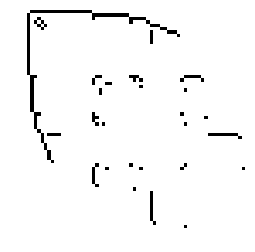

In [25]:
print x.shape
ind = -1 #ri(5500,5600)
print ind
plt.axis('off')
plt.imshow(x[ind].reshape(64,64), cmap='gray_r', interpolation='nearest')
# plt.title('Road')
plt.savefig('gowalla_sorted.pdf')

In [80]:
filename = '../graph-sig/data/source/roadnet/64/0.txt'

In [71]:
from get_a_x import get_a_x as ax

In [72]:
cur_a, _ = ax(filename)
cur_a_1, _ = ax_1(filename)

In [73]:
cur_a.shape

(8, 8)

In [74]:
x = cur_a
x_1 = cur_a_1

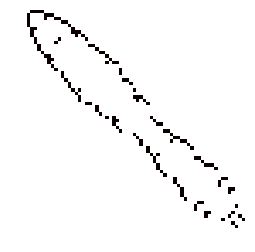

In [42]:
plt.axis('off')
plt.imshow(x_1.reshape(64,64), cmap='hot_r', interpolation='nearest')
plt.savefig('road_sorted.svg')

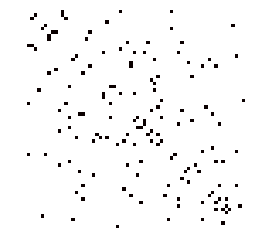

In [43]:
plt.axis('off')
plt.imshow(x.reshape(8,8), cmap='hot_r', interpolation='nearest')
plt.savefig('road_unsorted_8.svg')

In [2]:
import networkx as nx

In [6]:
G = nx.read_edgelist(filename)
G2 = nx.read_edgelist('../graph-sig/data/source/roadnet/64/1.txt')
G3 = nx.read_edgelist('../graph-sig/data/source/roadnet/64/2.txt')
G5 = nx.read_edgelist('../graph-sig/data/source/roadnet/64/3.txt')
G6 = nx.read_edgelist('../graph-sig/data/source/roadnet/64/4.txt')
G7 = nx.read_edgelist('../graph-sig/data/source/roadnet/64/5.txt')
for edge in G2.edges():
    G.add_edge(edge[0], edge[1])
for edge in G3.edges():
    G.add_edge(edge[0], edge[1])
for edge in G5.edges():
    G.add_edge(edge[0], edge[1])
for edge in G6.edges():
    G.add_edge(edge[0], edge[1])
for edge in G7.edges():
    G.add_edge(edge[0], edge[1])

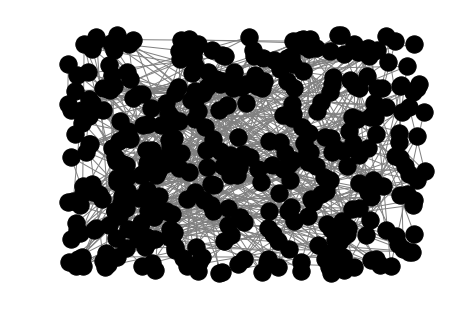

In [7]:
nx.draw(G, pos=nx.random_layout(G), node_color='k', edge_color='gray')
plt.savefig('big_graph.pdf')

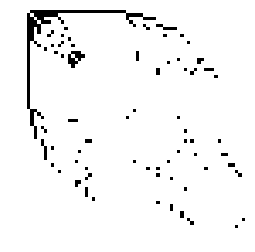

In [51]:
data = 'gowalla'
filename = '../graph-sig/data/source/'+data+'/64/23.txt'
from get_a_x_1 import get_a_x as ax_1
x_1, _ = ax_1(filename)
plt.axis('off')
plt.imshow(x_1, cmap='gray_r', interpolation='nearest')
plt.savefig(data+'_sorted.pdf',bbox_inches='tight')

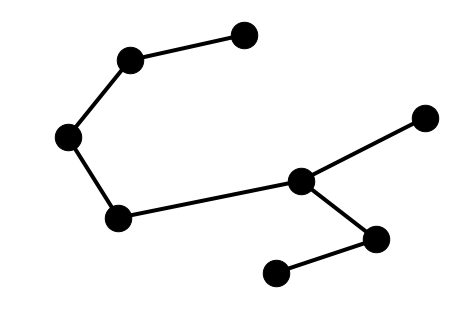

In [34]:
data = 'roadnet'
filename = '../graph-sig/data/source/'+data+'/8/8.txt'
from get_a_x_1 import get_a_x as ax_1
x_1, _ = ax_1(filename)
G4 = nx.from_numpy_matrix(x_1)
nx.draw(G4, pos=nx.spring_layout(G4), node_color='k', edge_color='black',node_size=700,width=4)
plt.savefig('small_graph_8_1.pdf')

In [7]:
import networkx as nx
data = 'random2_wikipedia'
filename = 'data/' + data + '.txt'
graph = nx.read_edgelist(filename)
from extract_random_walks import sample_random_walk as rw
from order_nodes import order_nodes as on

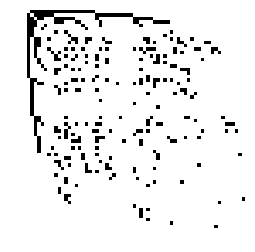

In [9]:
n = 64
g = nx.from_edgelist(rw(graph, n))
while len(g.nodes()) != n:
    g = nx.from_edgelist(rw(graph, n))
x_1 = nx.attr_matrix(g, rc_order=on(g))
plt.axis('off')
plt.imshow(x_1, cmap='gray_r', interpolation='nearest')
plt.savefig(data + '_0.pdf',bbox_inches='tight')

In [4]:
import random

def edge_swap(graph, nswap):
    # return nx.double_edge_swap(graph, nswap=swaps, max_tries=swaps*100)
    tries = 0
    swapcount = 0
    keys, degrees = zip(*graph.degree().items())  # keys, degree
    cdf = nx.utils.cumulative_distribution(degrees)  # cdf of degree
    while swapcount < nswap:
        # if random.random() < 0.5: continue # trick to avoid periodicities?
        # pick two random edges without creating edge list
        # choose source node indices from discrete distribution
        (ui, xi) = nx.utils.discrete_sequence(2, cdistribution=cdf)
        if ui == xi:
            continue  # same source, skip
        u = keys[ui]  # convert index to label
        x = keys[xi]
        # choose target uniformly from neighbors
        v = random.choice(list(graph[u]))
        y = random.choice(list(graph[x]))
        if v == y:
            continue  # same target, skip
        if (x not in graph[u]) and (y not in graph[v]):  # don't create parallel edges
            graph.add_edge(u, x)
            graph.add_edge(v, y)
            graph.remove_edge(u, v)
            graph.remove_edge(x, y)
            swapcount += 1
        tries += 1
    return graph

graph_random = nx.read_edgelist(filename)
swapsp = 50
swaps = len(graph.edges()) * swapsp * 1.0 / 100
graph_random = edge_swap(graph_random, swaps)

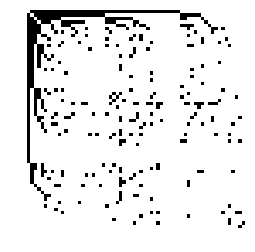

In [115]:
n = 64
gr = nx.from_edgelist(rw(graph_random, n))
while len(gr.nodes()) != n:
    gr = nx.from_edgelist(rw(graph_random, n))
x_1 = nx.attr_matrix(gr, rc_order=on(gr))
plt.axis('off')
plt.imshow(x_1, cmap='gray_r', interpolation='nearest')
plt.savefig(data + '_' + str(swapsp) + '.pdf',bbox_inches='tight')